<a href="https://colab.research.google.com/github/harujem/dataAnalysis/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_EDA%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니프로젝트 - EDA분석

In [3]:
# 코드 실행 후 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 멧플롯립 한글폰트 지정
plt.rc('font', family='NanumBarunGothic')    # 코랩에서 사용
# plt.rc('font', family='Malgun Gothic')     # 윈도우에서 사용
plt.rcParams['axes.unicode_minus'] = False

## 데이터 분석 제목: 유아복 무료 나눔

## 데이터 수집

 - 서울시 유아 연령별 인구 분포를 바탕으로 효율적인 나눔 행사 진행
 - 서울시 구별로 0세부터 7세까지 총합, 남, 여 인구수 데이터
 - https://jumin.mois.go.kr/

In [2]:
import pandas as pd
df = pd.read_csv('202403_202403_연령별인구현황_월간.csv', encoding='cp949')
df.head()

,행정구역,2024년03월_계_총인구수,2024년03월_계_연령구간인구수,2024년03월_계_0세,2024년03월_계_1세,2024년03월_계_2세,2024년03월_계_3세,2024년03월_계_4세,2024년03월_계_5세,2024년03월_계_6세,...,2024년03월_여_총인구수,2024년03월_여_연령구간인구수,2024년03월_여_0세,2024년03월_여_1세,2024년03월_여_2세,2024년03월_여_3세,2024년03월_여_4세,2024년03월_여_5세,2024년03월_여_6세,2024년03월_여_7세
0,서울특별시 (1100000000),"9,384,739","372,033","36,904","40,232","42,550","43,198","46,125","49,533","53,402",...,"4,848,611","180,893","17,896","19,803","20,573","21,125","22,179","23,757","26,184","29,376"
1,서울특별시 서울특별시 종로구 (1111000000),"139,498","4,161",366,434,480,469,551,536,612,...,"72,270","2,034",170,209,222,237,269,266,306,355
2,서울특별시 서울특별시 중구 (1114000000),"121,602","4,330",487,510,566,556,527,518,544,...,"62,835","2,138",229,253,290,271,250,257,273,315
3,서울특별시 서울특별시 용산구 (1117000000),"209,849","8,240",895,"1,011",962,997,"1,054","1,072","1,084",...,"109,361","4,043",450,518,454,488,491,528,540,574
4,서울특별시 서울특별시 성동구 (1120000000),"276,964","12,911","1,388","1,480","1,631","1,571","1,649","1,653","1,696",...,"142,732","6,197",680,697,800,729,786,806,831,868


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   행정구역                26 non-null     object
 1   2024년03월_계_총인구수     26 non-null     object
 2   2024년03월_계_연령구간인구수  26 non-null     object
 3   2024년03월_계_0세       26 non-null     object
 4   2024년03월_계_1세       26 non-null     object
 5   2024년03월_계_2세       26 non-null     object
 6   2024년03월_계_3세       26 non-null     object
 7   2024년03월_계_4세       26 non-null     object
 8   2024년03월_계_5세       26 non-null     object
 9   2024년03월_계_6세       26 non-null     object
 10  2024년03월_계_7세       26 non-null     object
 11  2024년03월_남_총인구수     26 non-null     object
 12  2024년03월_남_연령구간인구수  26 non-null     object
 13  2024년03월_남_0세       26 non-null     object
 14  2024년03월_남_1세       26 non-null     object
 15  2024년03월_남_2세       26 non-null     object
 16  2024년03월_남_3세       26 non-n

## 데이터 전처리

In [5]:
# 행정구역 연령별 총합 컬럼만 가져옴
# df = df.iloc[:, [0,3,4,5,6,7,8,9,10]]
# df.head()

,행정구역,2024년03월_계_0세,2024년03월_계_1세,2024년03월_계_2세,2024년03월_계_3세,2024년03월_계_4세,2024년03월_계_5세,2024년03월_계_6세,2024년03월_계_7세
0,서울특별시 (1100000000),"36,904","40,232","42,550","43,198","46,125","49,533","53,402","60,089"
1,서울특별시 서울특별시 종로구 (1111000000),366,434,480,469,551,536,612,713
2,서울특별시 서울특별시 중구 (1114000000),487,510,566,556,527,518,544,622
3,서울특별시 서울특별시 용산구 (1117000000),895,"1,011",962,997,"1,054","1,072","1,084","1,165"
4,서울특별시 서울특별시 성동구 (1120000000),"1,388","1,480","1,631","1,571","1,649","1,653","1,696","1,843"


In [3]:
# 행정구역별 미취학 아동 총합 컬럼만 가져옴
df = df.iloc[:, [0,2]]
df.head()

,행정구역,2024년03월_계_연령구간인구수
0,서울특별시 (1100000000),"372,033"
1,서울특별시 서울특별시 종로구 (1111000000),"4,161"
2,서울특별시 서울특별시 중구 (1114000000),"4,330"
3,서울특별시 서울특별시 용산구 (1117000000),"8,240"
4,서울특별시 서울특별시 성동구 (1120000000),"12,911"


In [ ]:
# 행정구역에서 구 정보 추출
df['행정구역'].str.split(' ').str[2]

0     (1100000000)
1              종로구
2               중구
3              용산구
4              성동구
5              광진구
6             동대문구
7              중랑구
8              성북구
9              강북구
10             도봉구
11             노원구
12             은평구
13            서대문구
14             마포구
15             양천구
16             강서구
17             구로구
18             금천구
19            영등포구
20             동작구
21             관악구
22             서초구
23             강남구
24             송파구
25             강동구
Name: 행정구역, dtype: object

## 데이터 시각화

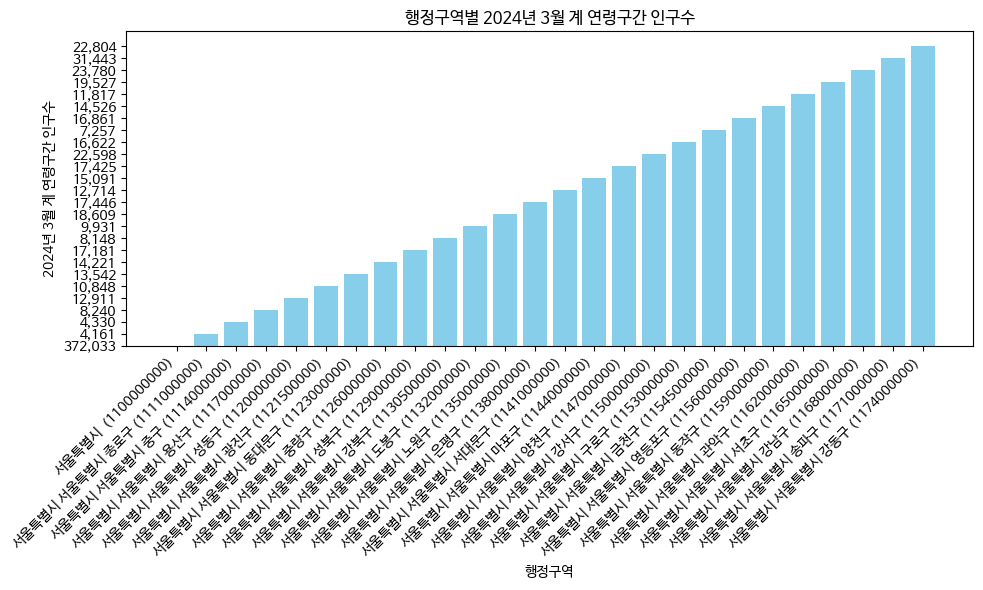

In [6]:
# 막대그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(df['행정구역'], df["2024년03월_계_연령구간인구수"], color='skyblue')
plt.xlabel('행정구역')
plt.ylabel('2024년 3월 계 연령구간 인구수')
plt.title('행정구역별 2024년 3월 계 연령구간 인구수')
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전 및 정렬
plt.tight_layout()

# 막대그래프 출력
plt.show()

## 데이터 분석 결과